In [1]:
import pandas as pd
import numpy as np
import random
import json
import os

import matplotlib.pyplot as plt

In [2]:
task1_dataset_path = "../inputs/dataset/smart2021-AT_Answer_Type_Prediction/"

dbpedia_train_path = task1_dataset_path + "dbpedia/task1_dbpedia_train.json"

In [3]:
dbpedia_hierarchy = {}
with open(dbpedia_train_path) as json_file:
    dbpedia_hierarchy = json.load(json_file)

dbpedia_df = pd.DataFrame(dbpedia_hierarchy)
print(len(dbpedia_df))
dbpedia_df.head()

36670


,id,question,category,type
0,0,Was Jacqueline Kennedy Onassis a follower of M...,boolean,[boolean]
1,1,What is the name of the opera based on Twelfth...,resource,"[dbo:Opera, dbo:MusicalWork, dbo:Work]"
2,2,When did Lena Horne receive the Grammy Award f...,literal,[date]
3,3,Do Prince Harry and Prince William have the sa...,boolean,[boolean]
4,5,Which is the hierarchical BrainInfo ID of the ...,literal,[string]


In [4]:
# split dataset
train_df = dbpedia_df.sample(frac=0.9,random_state=0,axis=0)
test_df = dbpedia_df[~dbpedia_df.index.isin(train_df.index)]
print('train size: ',len(train_df))
print('test size:',len(test_df))
train_df.to_json(task1_dataset_path + 'dbpedia/2021_dbpedia_0.9train.json', orient='records')
test_df.to_json(task1_dataset_path + 'dbpedia/2021_dbpedia_0.1test.json', orient='records')

train size:  33003
test size: 3667


In [5]:
# data clean
def data_clean_func(data_df):
    print('before: ',len(data_df))
    data_df = data_df[data_df.question.notna()]
    print('question after: ',len(data_df))
    data_df = data_df[data_df.category.notna()]
    print('category after: ',len(data_df))
#     data_df = data_df[data_df.type.notna()]
    data_df = data_df[data_df.type.str.len()>0]
    print('type after: ',len(data_df))
    return data_df

dbpedia_df = data_clean_func(dbpedia_df)


before:  36670
question after:  36670
category after:  36670
type after:  36670


In [6]:
# number of text length 
from collections import Counter

def get_text_length(data_df):
    text = data_df['question']
    text_length = [len(sentence.split()) for sentence in text]
    text_counter = Counter(text_length)
    max_length = max(text_counter.keys())
    min_length = min(text_counter.keys())
    
    return max_length, min_length

pbpedia_max_text,pbpedia_min_text = get_text_length(dbpedia_df)
print('pbpedia max_sentence: ',pbpedia_max_text)
print('pbpedia min_sentence: ',pbpedia_min_text)

# 频数区间
text = dbpedia_df['question']
text_length = [len(sentence.split()) for sentence in text]
train_counter =  Counter(text_length)
max_frequency = train_counter.most_common()[0][-1]
min_frequency = train_counter.most_common()[-1][-1]

print('max_frequency: ',max_frequency)
print('min_frequency: ',min_frequency)
train_counter.most_common()

pbpedia max_sentence:  114
pbpedia min_sentence:  1
max_frequency:  6157
min_frequency:  1


[(7, 6157),
 (8, 5478),
 (6, 5122),
 (5, 4174),
 (9, 4173),
 (10, 3019),
 (11, 2235),
 (12, 1518),
 (13, 1124),
 (4, 872),
 (14, 776),
 (15, 598),
 (16, 395),
 (17, 288),
 (3, 212),
 (18, 183),
 (19, 108),
 (20, 72),
 (21, 46),
 (22, 31),
 (23, 20),
 (24, 12),
 (25, 8),
 (1, 8),
 (26, 7),
 (2, 5),
 (27, 4),
 (28, 4),
 (29, 3),
 (33, 2),
 (31, 2),
 (35, 2),
 (30, 2),
 (48, 1),
 (69, 1),
 (62, 1),
 (43, 1),
 (99, 1),
 (47, 1),
 (114, 1),
 (38, 1),
 (40, 1),
 (54, 1)]

No handles with labels found to put in legend.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


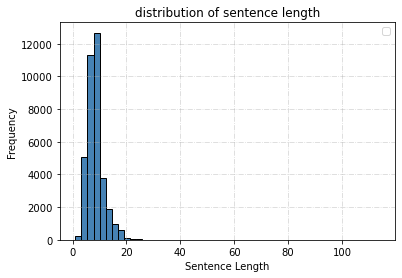

In [7]:
# plot distribution of sentence length
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]='SimHei'
plt.rcParams['axes.unicode_minus']=False
from pandas.core.frame import DataFrame

text = dbpedia_df['question']
text_length = [len(sentence.split()) for sentence in text]

bins = 50
plt.hist(x=text_length,
    bins=bins,
    color="steelblue",
    edgecolor="black")
plt.grid(alpha=0.5,linestyle='-.') #网格线，更好看
plt.title("distribution of sentence length")
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

['literal', 'resource', 'boolean']


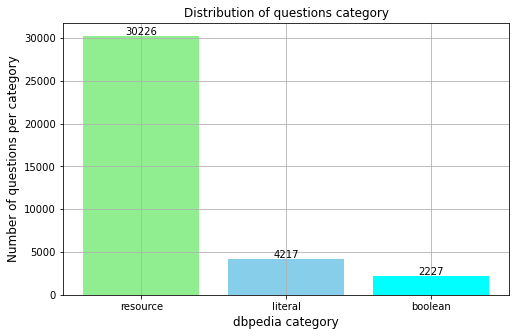

In [8]:
x_category = list(set(dbpedia_df.category.values))
print(x_category)
y_number = []
for category in x_category:
    y_number.append(len(dbpedia_df[dbpedia_df.category==category]))
y_number,x_category = (list(t) for t in zip(*sorted(zip(y_number,x_category),reverse = True)))
plt.figure(figsize=(8,5))
plt.bar(range(len(x_category)),y_number, color=['lightgreen','skyblue','cyan'],tick_label=x_category)

# 给条形图添加数据标注
for x, y in enumerate(y_number):
  plt.text(x, y+150, "%s"%y, ha='center')

plt.title("Distribution of questions category")
plt.ylabel('Number of questions per category', fontsize=12)
plt.xlabel('dbpedia category', fontsize=12)
plt.grid()
#plt.savefig('./img.png)
plt.show()

In [9]:
dbpedia_resource_df = dbpedia_df[dbpedia_df['category']=='resource']
dbpedia_resource_df.head()
print(len(dbpedia_resource_df))

30226


In [10]:
def draw_from_dict(dicdata,RANGE, heng=0):
    #dicdata：字典的数据。
    #RANGE：截取显示的字典的长度。
    #heng=0，代表条状图的柱子是竖直向上的。heng=1，代表柱子是横向的。考虑到文字是从左到右的，让柱子横向排列更容易观察坐标轴。
    by_value = sorted(dicdata.items(),key = lambda item:item[1],reverse=True)
    x = []
    y = []
    for d in by_value:
        x.append(d[0])
        y.append(d[1])
    fig = plt.figure(figsize=(20,7))
    ax = fig.add_subplot(111)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    #ax.set_xlabel('answer type in resource category', fontsize=30)
    ax.set_ylabel('Frequency of answer type', fontsize=30)
    
    if heng == 0:
        plt.bar(x[0:RANGE], y[0:RANGE])
        plt.title('Distribution of Answer Types in resource Categor',fontsize=30)
        plt.xticks(rotation=90)
        #plt.grid()
        plt.savefig('./answer_type.jpg',dpi=300)
        plt.show()
        return 
    elif heng == 1:
        plt.barh(x[0:RANGE], y[0:RANGE])
        plt.title('Distribution of Answer Types in resource Categor',fontsize=30)
        plt.xticks(rotation=90)
        #plt.grid()
        plt.savefig('./answer_type.jpg',dpi=300)
        # plt.savefig('answer_type.png')
        # /home/jovyan/work/SMART2021/code_dbpedia
        plt.show()
        return 
    else:
        return "heng的值仅为0或1！"

In [29]:
type_list = []

for types in dbpedia_resource_df.type:
    for type in types:
        type_list.append(type)
x_type = list(set(type_list))

# dictionary
type_number = {}
for key in x_type:
    type_number[key] = 0

for types in dbpedia_resource_df.type:
    for type in types:
        if type in x_type:
            type_number[type] += 1
        else:
            type_number[type] = 1
by_value = sorted(type_number.items(),key = lambda item:item[1],reverse=True)
cnt = 0
for i in by_value:
    num = list(i)[1]
    if num > 200:
        cnt += 1
print(cnt)

60


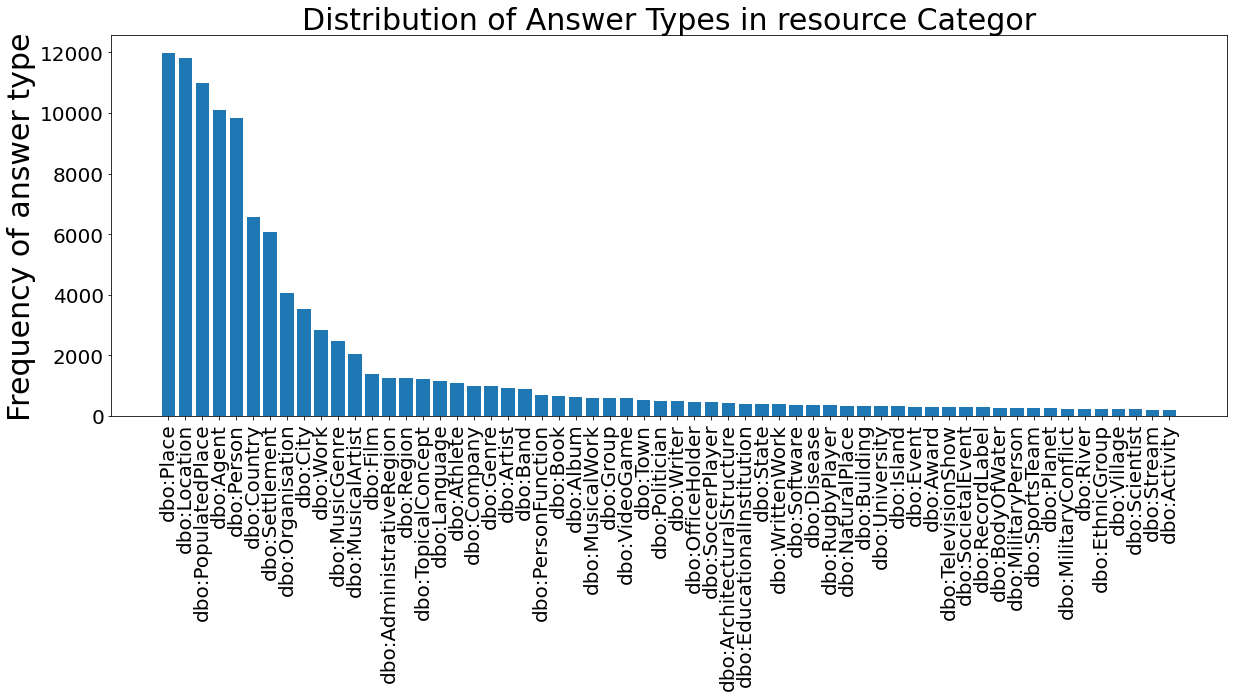

In [30]:
RANGE = cnt
draw_from_dict(type_number,RANGE, heng=0)

In [13]:
def types_to_specific_type(type_list):
    #print(type_list)
    if len(type_list) == 0:
        
        return None 
    return type_list[0]

def types_to_top_type(type_list):
    if len(type_list) == 0:
        return None 
    return type_list[-1]

In [14]:
dbpedia_resource_df['bottom_level_type'] = dbpedia_resource_df.type.apply(types_to_specific_type)
dbpedia_resource_df['top_level_type'] = dbpedia_resource_df.type.apply(types_to_top_type)

/tmp/ipykernel_2654/564257405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbpedia_resource_df['bottom_level_type'] = dbpedia_resource_df.type.apply(types_to_specific_type)
/tmp/ipykernel_2654/564257405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbpedia_resource_df['top_level_type'] = dbpedia_resource_df.type.apply(types_to_top_type)


In [15]:
# mapping_csv = resources_dir+'/mapping_specific.csv'
mapping_csv = 'mapping_specific.csv'
i=0
id_to_label ={}
label_to_id ={}
with open(mapping_csv,'w') as fw:
    for c in dbpedia_resource_df['bottom_level_type'].unique():
        #print(c)
        fw.write(c+','+str(i)+'\n')
        id_to_label[i]= c
        label_to_id[c] = i
        i+=1
    

In [16]:
import pandas as pd

In [17]:
# training data from the challenge 2021
train_fname = '../inputs/dataset/smart2021-AT_Answer_Type_Prediction/dbpedia/task1_dbpedia_train.json'
dbpedia_train_df = pd.read_json(train_fname)

# cleaning DBpedia dataset
dbpedia_train_df= dbpedia_train_df[dbpedia_train_df.category.notna()]
dbpedia_train_df= dbpedia_train_df[dbpedia_train_df['type'].notna()]
dbpedia_train_df.dropna(subset=['question'], inplace=True)


answer_types = {}
for answers in dbpedia_train_df.type:
    if answers == None:
        continue
    for a in answers:
        if a in answer_types:
            answer_types[a]+=1
        else:
            answer_types[a]=1


In [18]:
def types_to_top_type(type_list):
    if len(type_list) == 0:
        return None 
    return type_list[-1]

def types_to_specific_type(type_list):
    if len(type_list) == 0:
        return None 
    return type_list[0]

In [19]:

answ_df = pd.DataFrame.from_dict(answer_types, orient='index', columns=['Freq'])
sorted_types = answ_df.sort_values(by='Freq', ascending=False).to_dict()['Freq']

#dbpedia_df['frequent_type'] =dbpedia_df.type.apply(types_to_freqtype)
dbpedia_train_df['bottom_level_type'] =dbpedia_train_df.type.apply(types_to_specific_type)
dbpedia_train_df['top_level_type'] =dbpedia_train_df.type.apply(types_to_top_type)

In [20]:
dbpedia_train_df['top_level_type'].value_counts()

dbo:Agent               7346
dbo:PopulatedPlace      7010
dbo:Work                2740
dbo:MusicGenre          2332
boolean                 2227
                        ... 
dbo:SoccerTournament       1
dbo:Fish                   1
dbo:Chef                   1
dbo:FormulaOneTeam         1
dbo:HorseTrainer           1
Name: top_level_type, Length: 202, dtype: int64

In [21]:
print(len(dbpedia_train_df['top_level_type'].unique()))

202
